In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
h4 = cv2.imread('Lettuce_disease/train/healthy/h4.jpg')


In [3]:
h4 = cv2.cvtColor(h4,cv2.COLOR_BGR2RGB)

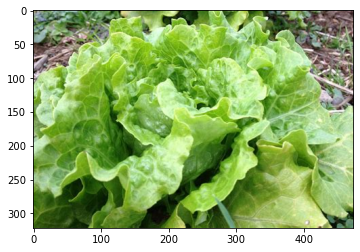

In [4]:
plt.imshow(h4)

In [5]:
h4.shape

(322, 474, 3)

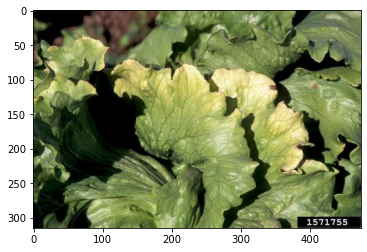

In [6]:
th4 = cv2.imread('Lettuce_disease/train/viral/th4.jpg')
th4 = cv2.cvtColor(th4,cv2.COLOR_BGR2RGB)
plt.imshow(th4)

In [7]:
th4.shape
th4.max()

255

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen = ImageDataGenerator(rotation_range = 30,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2, 
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                              )

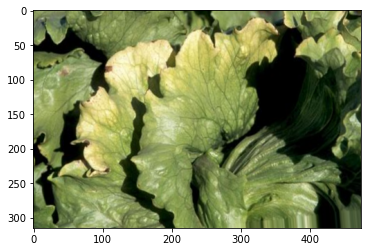

In [10]:
plt.imshow(image_gen.random_transform(th4))

In [11]:
image_gen.flow_from_directory('Lettuce_disease/train')

Found 29 images belonging to 2 classes.


In [12]:
inputshape = (150,150,3)

In [13]:
from keras.models import Sequential

In [14]:
#tensorflow uses MaxPool2D not MaxPooling2D but it is an alias
from keras.layers import Activation,Dropout,Dense,Flatten,Conv2D,MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3), input_shape=inputshape,
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 input_shape=inputshape,
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 input_shape= inputshape,
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu')) #same thing as adding in dense

model.add(Dropout(0.5)) #randomly turns off 50% of neurons during training to help w/ overfitting

model.add(Dense(1)) #would be one if just cat or dog
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [55]:
batch_size = 4
train_image_gen = image_gen.flow_from_directory('Lettuce_disease/train',
                                              target_size = inputshape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary')


Found 29 images belonging to 2 classes.


In [56]:
test_image_gen = image_gen.flow_from_directory('Lettuce_disease/test',
                                              target_size = inputshape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary')



Found 8 images belonging to 2 classes.


In [57]:
train_image_gen.class_indices

{'healthy': 0, 'viral': 1}

In [58]:
results = model.fit(train_image_gen, epochs = 10,
                             validation_data = test_image_gen, validation_steps = 12)

Epoch 1/10
1/1 [==============================] - 1s 872ms/step - loss: 1.2709 - accuracy: 0.6897 - val_loss: 1.4595 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 1s 565ms/step - loss: 1.2435 - accuracy: 0.6207
Epoch 3/10
1/1 [==============================] - 1s 542ms/step - loss: 1.0395 - accuracy: 0.6207
Epoch 4/10
1/1 [==============================] - 1s 531ms/step - loss: 0.8292 - accuracy: 0.6897
Epoch 5/10
1/1 [==============================] - 1s 526ms/step - loss: 0.8332 - accuracy: 0.6552
Epoch 6/10
1/1 [==============================] - 1s 518ms/step - loss: 0.6107 - accuracy: 0.6897
Epoch 7/10
1/1 [==============================] - 1s 513ms/step - loss: 0.5116 - accuracy: 0.7586
Epoch 8/10
1/1 [==============================] - 1s 516ms/step - loss: 0.3925 - accuracy: 0.8276
Epoch 9/10
1/1 [==============================] - 1s 522ms/step - loss: 0.3764 - accuracy: 0.7931
Epoch 10/10
1/1 [==============================] - 1s 552ms/step - loss: 0.3

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
results.history['accuracy']

[0.6896551847457886,
 0.6206896305084229,
 0.6206896305084229,
 0.6896551847457886,
 0.6551724076271057,
 0.6896551847457886,
 0.7586206793785095,
 0.8275862336158752,
 0.7931034564971924,
 0.7931034564971924]

In [61]:
#model.save('myfirstplantcvmodel.h5')

In [62]:
#from keras.models import load_model

In [63]:
#new_model = load_model('myfirstplantcvmodel.h5')

In [64]:
healthy_lettuce_file = 'Lettuce_disease/test/healthy/h18.jpg'

In [65]:
from keras.preprocessing import image

In [66]:
healthy_image = image.load_img(healthy_lettuce_file,
                          target_size = inputshape[:2])

In [67]:
healthy_image = image.img_to_array(healthy_image)

In [68]:
healthy_image.shape


(150, 150, 3)

In [69]:
#dont rerun this cell often as it will keep expanding the image
import numpy as np
healthy_image = np.expand_dims(healthy_image, axis = 0) 

In [70]:
healthy_image.shape

(1, 150, 150, 3)

In [71]:
healthy_image = healthy_image/255

In [72]:
model.predict_classes(healthy_image) 

array([[0]], dtype=int32)

In [73]:
model.predict(healthy_image) #percent prediction

array([[0.07127988]], dtype=float32)